In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl


In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


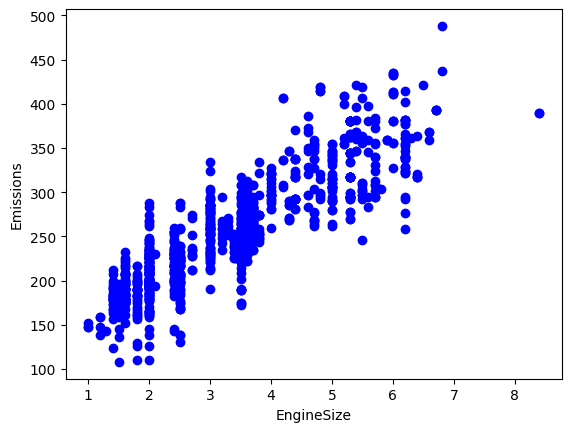

In [4]:
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'], color='b')
plt.xlabel('EngineSize')
plt.ylabel('Emissions')
plt.show()

In [5]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
poly_train_x = poly.fit_transform(train_x)
print(f'x_1 is :\n{train_x[:3]}')

print(f'ploy transform x is :\n{poly_train_x}')

x_1 is :
[[2. ]
 [3.5]
 [3.5]]
ploy transform x is :
[[ 1.    2.    4.  ]
 [ 1.    3.5  12.25]
 [ 1.    3.5  12.25]
 ...
 [ 1.    3.    9.  ]
 [ 1.    3.2  10.24]
 [ 1.    3.2  10.24]]


In [7]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

train_y_ = clf.fit(poly_train_x, train_y)
print('Coefficents : ', clf.coef_)
print('Intercept : ', clf.intercept_)

Coefficents :  [[ 0.         51.26575552 -1.59917029]]
Intercept :  [104.39375097]


Text(0, 0.5, 'Emissions')

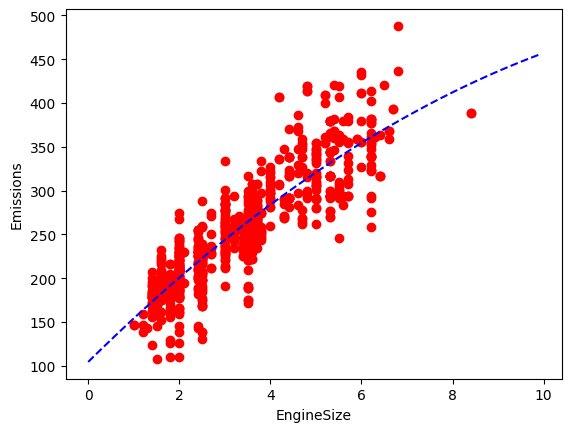

In [8]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color= 'red')

xx = np.arange(0, 10, 0.1)

yy = clf.intercept_[0] + clf.coef_[0][1]*xx + clf.coef_[0][2] * (xx **2)

plt.plot(xx, yy, 'b--')
plt.xlabel('EngineSize')
plt.ylabel('Emissions')

In [9]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print('Mean Absolute Error : ', np.mean(np.absolute(test_y_ - test_y)))
print('Residual Sum of Square : ', np.mean((test_y_ - test_y)**2))
print('R2-Score : ', r2_score(test_y, test_y_))

Mean Absolute Error :  24.194298991572904
Residual Sum of Square :  943.2121531770119
R2-Score :  0.765850612986424


with degree 3

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree= 3)
train_x_poly = poly.fit_transform(train_x)

print(f'x_1 is : \n', train_x[:3] )
print('poly transform x is :\n', train_x_poly)

x_1 is : 
 [[2. ]
 [3.5]
 [3.5]]
poly transform x is :
 [[ 1.     2.     4.     8.   ]
 [ 1.     3.5   12.25  42.875]
 [ 1.     3.5   12.25  42.875]
 ...
 [ 1.     3.     9.    27.   ]
 [ 1.     3.2   10.24  32.768]
 [ 1.     3.2   10.24  32.768]]


In [11]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)
print('Coefficents : ', clf.coef_)
print('Intercept : ', clf.intercept_)

Coefficents :  [[ 0.         24.24027724  5.80165074 -0.6099036 ]]
Intercept :  [133.24153445]


Text(0, 0.5, 'Emissions')

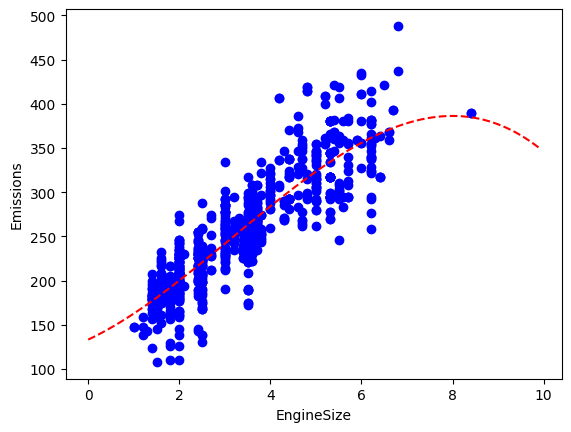

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color= 'Blue')

xx = np.arange(0, 10, 0.1)
yy = clf.intercept_[0] + clf.coef_[0][1]*xx + clf.coef_[0][2] * (xx **2) +  clf.coef_[0][3] * (xx **3)


plt.plot(xx, yy, 'r--')
plt.xlabel('EngineSize')
plt.ylabel('Emissions')

In [13]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print('Mean Absolute Error : ', np.mean(np.absolute(test_y_ - test_y)))
print('Residual Sum of Square : ', np.mean((test_y_ - test_y)**2))
print('R2-Score : ', r2_score(test_y, test_y_))

Mean Absolute Error :  24.42199323865994
Residual Sum of Square :  952.9358605849508
R2-Score :  0.7634367338592315
